## Importando bibliotecas

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

## Tratando a Base

In [139]:
standard = StandardScaler()

In [140]:
df = pd.read_csv(r'C:\Users\marco\OneDrive\Documentos\Projetos\python_projects\notebook_prices\laptop_prices.csv')

In [141]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [143]:
df.isna().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [144]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

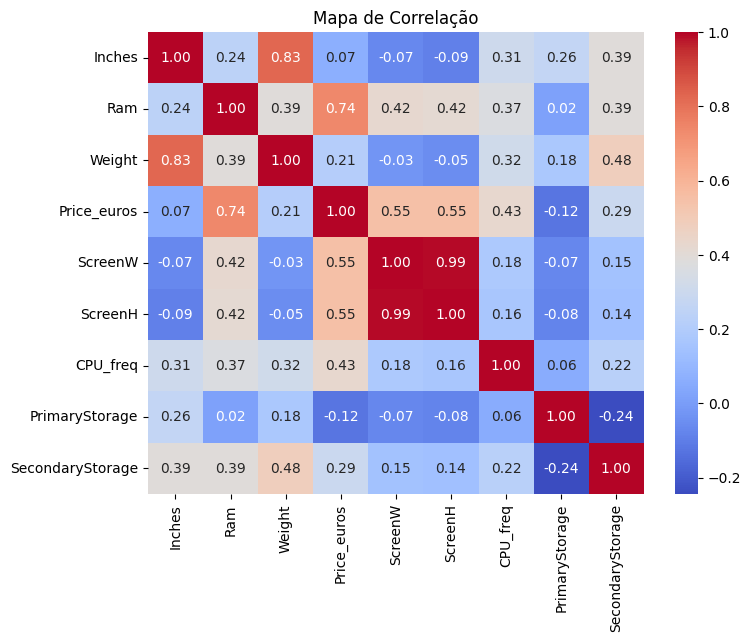

In [145]:
correlacao = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação')
plt.show()

Ram, ScreenH ou ScreenW (usar uma das duas, usar as duas causa multicolinearidade) e cpu_freq

In [146]:
df = df[['Ram', 'ScreenH', 'CPU_freq', 'Price_euros']]
df

,Ram,ScreenH,CPU_freq,Price_euros
0,8,1600,2.3,1339.69
1,8,900,1.8,898.94
2,8,1080,2.5,575.00
3,16,1800,2.7,2537.45
4,8,1600,3.1,1803.60
...,...,...,...,...
1270,4,1080,2.5,638.00
1271,16,1800,2.5,1499.00
1272,2,768,1.6,229.00
1273,6,768,2.5,764.00


## Regressão Linear

In [147]:
df

,Ram,ScreenH,CPU_freq,Price_euros
0,8,1600,2.3,1339.69
1,8,900,1.8,898.94
2,8,1080,2.5,575.00
3,16,1800,2.7,2537.45
4,8,1600,3.1,1803.60
...,...,...,...,...
1270,4,1080,2.5,638.00
1271,16,1800,2.5,1499.00
1272,2,768,1.6,229.00
1273,6,768,2.5,764.00


In [148]:
x_df = df['Ram'].values.reshape(-1, 1)
x_df

array([[8],
       [8],
       [8],
       ...,
       [2],
       [6],
       [4]])

In [149]:
y_df = df['Price_euros'].values.reshape(-1, 1)
y_df

array([[1339.69],
       [ 898.94],
       [ 575.  ],
       ...,
       [ 229.  ],
       [ 764.  ],
       [ 369.  ]])

In [150]:
SEED_LINEAR = 1
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=SEED_LINEAR)

In [151]:
x_train.shape, x_test.shape

((1020, 1), (255, 1))

In [152]:
x_train = standard.fit_transform(x_train)
x_train

array([[ 1.50330073],
       [-0.07545525],
       [ 1.50330073],
       ...,
       [-0.07545525],
       [ 1.50330073],
       [ 1.50330073]])

In [153]:
x_train.shape

(1020, 1)

In [154]:
x_test_scaled = standard.transform(x_test)

In [155]:
linear_regressor = LinearRegression()

linear_regressor.fit(x_train, y_train)

LinearRegression()

In [156]:
linear_regressor.intercept_, linear_regressor.coef_

(array([1123.6820098]), array([[522.40743086]]))

In [157]:
linear_regressor.score(x_train, y_train)

0.5505335889997903

In [158]:
linear_regressor.score(x_test, y_test) # :((((

-52.75351570966401

In [159]:
predicts = linear_regressor.predict(x_test)
predicts

array([[ 3213.31173325],
       [ 3213.31173325],
       [ 3213.31173325],
       [ 3213.31173325],
       [ 9482.20090358],
       [ 5302.94145669],
       [ 9482.20090358],
       [ 5302.94145669],
       [ 5302.94145669],
       [ 3213.31173325],
       [ 5302.94145669],
       [ 3213.31173325],
       [ 5302.94145669],
       [ 5302.94145669],
       [ 5302.94145669],
       [ 3213.31173325],
       [ 5302.94145669],
       [ 3213.31173325],
       [ 5302.94145669],
       [ 3213.31173325],
       [ 9482.20090358],
       [ 9482.20090358],
       [ 3213.31173325],
       [ 5302.94145669],
       [ 5302.94145669],
       [ 5302.94145669],
       [ 3213.31173325],
       [ 3213.31173325],
       [ 5302.94145669],
       [ 9482.20090358],
       [ 5302.94145669],
       [17840.71979736],
       [ 3213.31173325],
       [ 9482.20090358],
       [ 5302.94145669],
       [ 3213.31173325],
       [ 5302.94145669],
       [ 3213.31173325],
       [ 5302.94145669],
       [ 5302.94145669],


In [160]:
mae = mean_absolute_error(y_test, predicts)
mse = mean_squared_error(y_test, predicts)
r2 = r2_score(y_test, predicts)

mae, mse, r2

(np.float64(4475.193135548838),
 np.float64(25152553.603620466),
 -52.75351570966401)

## Regressão Linear Múltipla

## Regressão Polinomial

## Árvores de Decisão

## Random Forest

## SVM

## Redes Neurais